<a href="https://colab.research.google.com/github/davidsosaai/python_ml/blob/main/Clase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

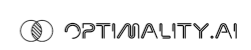

# Data Transformation and Feature Engineering

- Data transformation and feature engineering are critical steps in the data preprocessing pipeline for machine learning and data analysis tasks. They involve creating new features from existing ones, scaling, encoding categorical variables, handling missing data, and more. Here are some common techniques and libraries for data transformation and feature

# Data scaling and normalization
- Data scaling and normalization are essential preprocessing steps in data analysis and machine learning. They help ensure that features with different scales or units have a consistent influence on the models. Python provides libraries like scikit-learn and pandas for performing these operations. Here's how you can scale and normalize data using these libraries

## Min-Max Scaling (Normalization)

- Min-max scaling, also known as normalization, scales the data to a specific range, usually between 0 and 1.

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Sample data, reshape for 1D array

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

print(scaled_data)


[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


In [2]:
import pandas as pd

data = pd.Series([1, 2, 3, 4, 5])

normalized_data = (data - data.min()) / (data.max() - data.min())

print(normalized_data)


0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64


## Standardization (Z-Score Scaling)

- Standardization transforms data to have a mean of 0 and a standard deviation of 1. It is particularly useful when the data follows a normal distribution

In [3]:
from sklearn.preprocessing import StandardScaler
import numpy as np

data = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Sample data, reshape for 1D array

scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

print(standardized_data)


[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]


In [4]:
import pandas as pd

data = pd.Series([1, 2, 3, 4, 5])

standardized_data = (data - data.mean()) / data.std()

print(standardized_data)


0   -1.264911
1   -0.632456
2    0.000000
3    0.632456
4    1.264911
dtype: float64


- Choose between min-max scaling and standardization based on your data and modeling requirements. Min-max scaling is appropriate when you want your data to be within a specific range, while standardization is useful when working with algorithms that assume a standard normal distribution.

- Remember that it's essential to apply scaling and normalization separately to training and test datasets to avoid data leakage and ensure the model's generalizability

# Encoding categorical variables
- Encoding categorical variables is a crucial step in preparing data for machine learning models since most machine learning algorithms require numerical input. There are several techniques to encode categorical variables in Python, and the choice depends on the nature of the categorical data. Here are some common methods using libraries like pandas and scikit-learn

## One-Hot Encoding (pd.get_dummies)

- One-hot encoding converts each category into a binary column (0 or 1) and is suitable for nominal categorical variables (categories with no inherent order)

In [5]:
import pandas as pd

data = pd.DataFrame({'Category': ['A', 'B', 'A', 'C']})

# One-hot encode 'Category'
encoded_data = pd.get_dummies(data, columns=['Category'])

print(encoded_data)


   Category_A  Category_B  Category_C
0           1           0           0
1           0           1           0
2           1           0           0
3           0           0           1


## Label Encoding (scikit-learn)

- Label encoding assigns a unique integer to each category. It's appropriate for ordinal categorical variables (categories with a specific order)

In [6]:
from sklearn.preprocessing import LabelEncoder

data = pd.Series(['Low', 'Medium', 'High', 'Medium'])

label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(data)

print(encoded_data)


[1 2 0 2]


## Ordinal Encoding (manually)

- For ordinal variables, you can manually map categories to numerical values

In [7]:
data = pd.Series(['Low', 'Medium', 'High', 'Medium'])

# Define mapping
mapping = {'Low': 0, 'Medium': 1, 'High': 2}

encoded_data = data.map(mapping)

print(encoded_data)


0    0
1    1
2    2
3    1
dtype: int64


## Binary Encoding (category_encoders)

- The category_encoders library provides various encoding methods, including Binary Encoding, which combines the efficiency of one-hot encoding with the ability to handle high-cardinality categorical features

In [10]:
#if not installed
#! pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 936.7 kB/s eta 0:00:00


In [11]:
import category_encoders as ce
import pandas as pd

data = pd.DataFrame({'Category': ['A', 'B', 'A', 'C', 'B']})

encoder = ce.BinaryEncoder(cols=['Category'])
encoded_data = encoder.fit_transform(data)

print(encoded_data)

   Category_0  Category_1
0           0           1
1           1           0
2           0           1
3           1           1
4           1           0


Choose the encoding method based on the type of categorical variable you are dealing with and the requirements of your machine learning model. Ensure that the chosen encoding aligns with the characteristics of your data to avoid introducing bias or misinterpretations.

# Creating new features

- Creating new features, also known as feature engineering, is a critical step in data preprocessing for machine learning tasks. New features can improve model performance and help capture complex patterns in the data. Here are some common techniques and examples of creating new features in Python using the pandas library

## Binning or Bucketing

- Create bins or buckets for continuous numeric variables to convert them into categorical variables.

In [12]:
import pandas as pd

data = pd.DataFrame({'Age': [25, 35, 45, 55, 65]})

# Create age bins
bins = [0, 30, 40, 50, 60, 100]
labels = ['<30', '30-40', '40-50', '50-60', '60+']

data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

print(data)


   Age Age_Group
0   25       <30
1   35     30-40
2   45     40-50
3   55     50-60
4   65       60+


## Encoding Time Information

- Extract information like year, month, day, or weekday from a datetime variable.

In [13]:
import pandas as pd

data = pd.DataFrame({'Date': ['2023-09-01', '2023-09-15', '2023-09-30']})

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, month, and day
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

print(data)


        Date  Year  Month  Day
0 2023-09-01  2023      9    1
1 2023-09-15  2023      9   15
2 2023-09-30  2023      9   30


## Feature Interaction

- Create new features by combining existing features using mathematical operations.

In [14]:
import pandas as pd

data = pd.DataFrame({'Feature1': [2, 3, 4], 'Feature2': [5, 6, 7]})

# Create a new feature by adding 'Feature1' and 'Feature2'
data['Sum'] = data['Feature1'] + data['Feature2']

print(data)


   Feature1  Feature2  Sum
0         2         5    7
1         3         6    9
2         4         7   11


## Polynomial Features

- Generate polynomial features by raising existing features to a certain power.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

data = pd.DataFrame({'Feature1': [2, 3, 4]})

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data)

print(poly_features)


[[ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]]


## Aggregation

- Aggregate data over certain dimensions, such as grouping by a categorical variable and calculating statistics for each group.

In [16]:
import pandas as pd

data = pd.DataFrame({'Category': ['A', 'B', 'A', 'B'], 'Value': [10, 15, 20, 25]})

# Calculate the mean value for each category
agg_data = data.groupby('Category')['Value'].mean().reset_index()

print(agg_data)


  Category  Value
0        A   15.0
1        B   20.0


These are just a few examples of feature engineering techniques. The choice of which techniques to use depends on your specific dataset and the problem you're trying to solve. Feature engineering often involves creativity and domain knowledge to extract meaningful information from the data and improve model performance

## Log transformation
- Logarithmic transformation is a common technique used to transform data with a skewed distribution, making it more normally distributed. This transformation is particularly useful when dealing with data that exhibits exponential growth or when you want to stabilize variances across a range of values. You can perform log transformations in Python using the numpy library for numerical operations. Here's how to do it

In [17]:
import numpy as np

# Sample data with a skewed distribution
data = np.array([1, 10, 100, 1000, 10000])

# Log transformation
log_transformed_data = np.log(data)

print(log_transformed_data)


[0.         2.30258509 4.60517019 6.90775528 9.21034037]


In the example above, we applied a natural logarithm (base e) transformation to the data. You can also use other logarithmic bases, such as 10 (common logarithm) or 2 (binary logarithm), by specifying the base in the np.log() function. For example:

In [18]:
log10_transformed_data = np.log10(data)  # Base 10 logarithm
log2_transformed_data = np.log2(data)    # Base 2 logarithm


Keep in mind that log transformations are not suitable for data with zero or negative values. If your data contains such values, you can add a constant value to it before applying the log transformation to avoid undefined results. For example:

In [19]:
data_with_zeros = np.array([0, 1, 10, 100, 1000, 10000])
constant = 1  # Add a small constant to avoid zero values

log_transformed_data_with_zeros = np.log(data_with_zeros + constant)


In [20]:
log_transformed_data_with_zeros

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478,
       9.21044037])

When using log-transformed data in your analysis or modeling, remember to interpret the results appropriately, as the transformed values represent the logarithm of the original data.

# Handling datetime data
- Handling datetime data in Python is a common task, especially when working with time series data or performing data analysis involving date and time information. Python provides several libraries and modules, such as datetime, pandas, and numpy, to work with datetime data efficiently. Here's how you can handle datetime data in Python

## datetime Module

- The datetime module in Python is part of the standard library and provides classes and functions for manipulating and formatting datetime objects

In [21]:
import datetime

# Creating a datetime object
current_datetime = datetime.datetime.now()
print("Current Datetime:", current_datetime)

# Formatting datetime
formatted_date = current_datetime.strftime("%Y-%m-%d %H:%M:%S")
print("Formatted Datetime:", formatted_date)

# Parsing a string to datetime
date_string = "2023-09-24 14:30:00"
parsed_datetime = datetime.datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S")
print("Parsed Datetime:", parsed_datetime)

# Performing arithmetic with datetime
one_day = datetime.timedelta(days=1)
tomorrow = current_datetime + one_day
print("Tomorrow:", tomorrow)


Current Datetime: 2023-09-24 15:56:18.573113
Formatted Datetime: 2023-09-24 15:56:18
Parsed Datetime: 2023-09-24 14:30:00
Tomorrow: 2023-09-25 15:56:18.573113


## pandas Library
- Handling datetime data in pandas is a common task, especially when working with time series data or datasets that include date and time information. Here's a step-by-step example of how to handle datetime data using pandas

In [37]:
import pandas as pd

# Create a sample dataset with datetime data
data = {'Date': ['2023-09-01', '2023-09-02', '2023-09-03'],
        'Value': [10, 15, 20]}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Display the DataFrame
print("Original DataFrame:")
print(df)

# Extract date components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Display the DataFrame with date components
print("\nDataFrame with Date Components:")
print(df)

# Calculate the difference between dates
df['Date_Diff'] = df['Date'].diff()

# Display the DataFrame with date differences
print("\nDataFrame with Date Differences:")
print(df)


Original DataFrame:
        Date  Value
0 2023-09-01     10
1 2023-09-02     15
2 2023-09-03     20

DataFrame with Date Components:
        Date  Value  Year  Month  Day
0 2023-09-01     10  2023      9    1
1 2023-09-02     15  2023      9    2
2 2023-09-03     20  2023      9    3

DataFrame with Date Differences:
        Date  Value  Year  Month  Day Date_Diff
0 2023-09-01     10  2023      9    1       NaT
1 2023-09-02     15  2023      9    2    1 days
2 2023-09-03     20  2023      9    3    1 days


In this example:

- We create a sample dataset with a 'Date' column in string format and a 'Value' column.

- We convert the 'Date' column to a datetime object using pd.to_datetime() to enable datetime operations.

- We extract date components (year, month, day) using the .dt accessor.

- We calculate the difference between consecutive dates using the .diff() method.

This demonstrates some common datetime operations, but pandas provides a wide range of datetime-related functionalities, including date arithmetic, date formatting, and date filtering, which can be extremely useful when working with time series data or datasets containing date and time information.

## numpy Library

- numpy can be used for numerical operations on datetime data, such as calculating time intervals.

In [32]:
import numpy as np

# Creating a date range using numpy
date_range = np.arange(np.datetime64("2023-09-01"), np.datetime64("2023-09-06"))
print("Datetime Range:")
print(date_range)

# Calculating time intervals
time_interval = date_range[1] - date_range[0]
print("Time Interval:", time_interval)


Datetime Range:
['2023-09-01' '2023-09-02' '2023-09-03' '2023-09-04' '2023-09-05']
Time Interval: 1 days


# Dimensionality reduction
- Dimensionality reduction is a technique used in machine learning and data analysis to reduce the number of features or variables in your dataset while preserving the most important information. This can help improve model performance, reduce overfitting, and speed up training. Two common techniques for dimensionality reduction in Python are Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE). Here's how you can use these techniques

## Principal Component Analysis (PCA)

- Principal Component Analysis (PCA) is a popular technique for dimensionality reduction and data visualization. Here's a step-by-step example of how to perform PCA in Python using the scikit-learn library

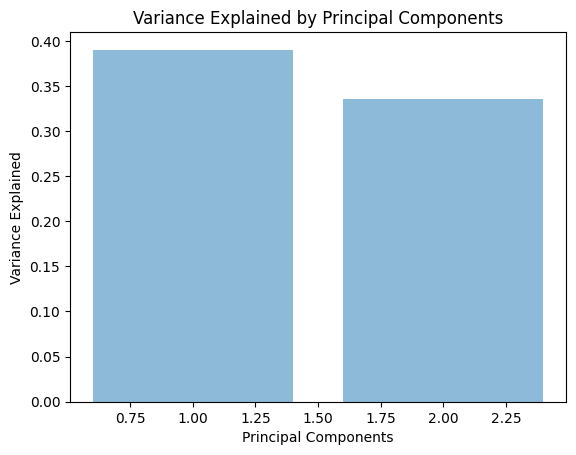

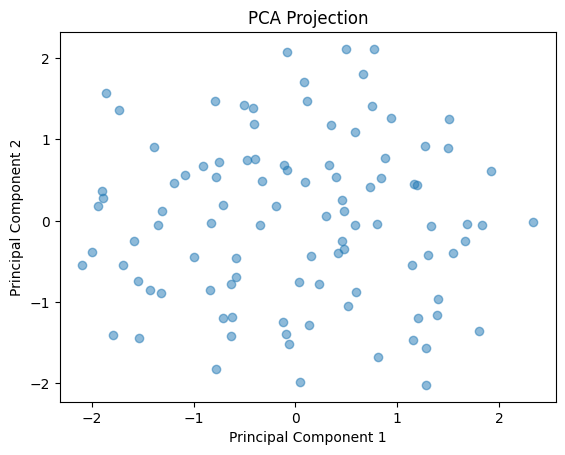

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create a sample dataset
np.random.seed(0)
data = np.random.rand(100, 3)  # 100 samples with 3 features

# Create a DataFrame for visualization
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])

# Standardize the data (PCA is sensitive to scale)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform PCA with the desired number of components
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Visualize the variance explained by each component
plt.bar(range(1, n_components + 1), explained_variance, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.show()

# Plot the data in the reduced dimension
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.show()


In this example:

- We create a random dataset with 100 samples and 3 features (Feature1, Feature2, Feature3).

- We standardize the data using StandardScaler because PCA is sensitive to the scale of the input features.

- We perform PCA with n_components=2 to reduce the dimensionality to 2 principal components.

- We create a DataFrame with the principal components (PC1 and PC2) and visualize the variance explained by each component.

- Finally, we plot the data in the reduced dimension using the first two principal components.

You can adjust the n_components parameter to specify the number of principal components you want to retain based on the amount of variance you wish to explain. The explained variance plot helps you decide how many principal components to keep.





Regenerate

## -Distributed Stochastic Neighbor Embedding (t-SNE)

- -Distributed Stochastic Neighbor Embedding (t-SNE) is a powerful technique for dimensionality reduction and visualization of high-dimensional data. Here's a step-by-step example of how to perform t-SNE in Python using the scikit-learn library

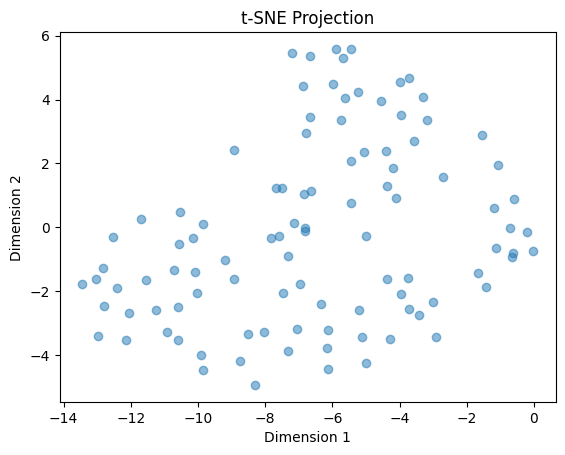

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Create a sample dataset
np.random.seed(0)
data = np.random.rand(100, 3)  # 100 samples with 3 features

# Create a DataFrame for visualization
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])

# Standardize the data (t-SNE is sensitive to scale)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform t-SNE with the desired number of components (typically 2 or 3)
n_components = 2
tsne = TSNE(n_components=n_components, random_state=0)
embedded_data = tsne.fit_transform(scaled_data)

# Create a DataFrame with the embedded data
tsne_df = pd.DataFrame(data=embedded_data, columns=['Dimension 1', 'Dimension 2'])

# Visualize the t-SNE projection
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], alpha=0.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Projection')
plt.show()


In this example:

- We create a random dataset with 100 samples and 3 features (Feature1, Feature2, Feature3).

- We standardize the data using StandardScaler because t-SNE is sensitive to the scale of the input features.

- We perform t-SNE with n_components=2 to reduce the dimensionality to 2 dimensions, which can be easily visualized.

- We create a DataFrame with the embedded data (Dimension 1 and Dimension 2) and visualize the t-SNE projection.


The t-SNE projection aims to capture the underlying structure or clusters in the high-dimensional data and provides a 2D representation that can be plotted for visualization purposes.







# References
Data transformation and feature engineering are crucial steps in preparing data for machine learning and analysis. Here are some references and resources for data transformation and feature engineering in Python:

**Books**:

1. "Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists" by Alice Zheng and Amanda Casari: This book provides a comprehensive overview of feature engineering techniques and best practices for machine learning.

2. "Python Feature Engineering Cookbook" by Soledad Galli: This book focuses on practical feature engineering techniques using Python and provides hands-on examples.

**Online Tutorials and Courses**:

3. [Feature Engineering for Machine Learning](https://www.coursera.org/specializations/aml): This Coursera specialization covers feature engineering and includes courses on data preprocessing, feature selection, and more.

4. [Machine Learning Feature Engineering Techniques](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114): A detailed blog post on various feature engineering techniques and when to use them.

**Kaggle Kernels and Notebooks**:

5. [Kaggle Feature Engineering](https://www.kaggle.com/learn/feature-engineering): Kaggle offers courses and kernels (notebooks) on feature engineering, where you can find practical examples and techniques used in real-world competitions.

**GitHub Repositories**:

6. [Feature Engineering for Machine Learning](https://github.com/datamunge/sign-language-recognition): This GitHub repository contains code and notebooks related to feature engineering for machine learning, with a focus on sign language recognition.

**Interactive Python Libraries**:

7. [Feature-engine](https://feature-engine.readthedocs.io/en/latest/): Feature-engine is an open-source Python library designed for feature engineering. It offers various transformers for data preprocessing tasks.

**Research Papers**:

8. "A Survey of Feature Selection and Feature Extraction Techniques in Machine Learning" by I. Guyon and A. Elisseeff: This survey paper provides an overview of feature selection and feature extraction techniques.

9. "The Elements of Statistical Learning" by Trevor Hastie, Robert Tibshirani, and Jerome Friedman: While primarily a book on machine learning, it contains valuable information on feature engineering.

These resources cover a wide range of feature engineering techniques, from the basics to advanced methods, and should help you gain a deeper understanding of how to preprocess and engineer features in Python for machine learning and data analysis.

**Dimensionality reduction is an essential technique in machine learning and data analysis for reducing the number of features while preserving important information. Here are some references and resources for dimensionality reduction in Python:**

**Books**:

1. "Introduction to Machine Learning with Python" by Andreas C. Müller and Sarah Guido: This book covers various aspects of machine learning, including dimensionality reduction techniques like PCA and t-SNE.

2. "Python Machine Learning" by Sebastian Raschka and Vahid Mirjalili: The book discusses PCA, LDA, and other dimensionality reduction methods in the context of machine learning.

**Online Courses and Tutorials**:

3. [Principal Component Analysis (PCA) in Python](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60): This tutorial on Medium explains PCA with Python code examples.

4. [Coursera - Machine Learning Specialization](https://www.coursera.org/specializations/machine-learning): This specialization includes courses on PCA and dimensionality reduction as part of its curriculum.

**Scikit-learn Documentation**:

5. [Scikit-learn Dimensionality Reduction](https://scikit-learn.org/stable/modules/decomposition.html): The official documentation of scikit-learn provides detailed information on dimensionality reduction techniques, including PCA, LLE, and more.

**Kaggle Kernels and Notebooks**:

6. [Kaggle PCA Tutorial](https://www.kaggle.com/bertcarremans/pca-explained-and-applied): Kaggle has numerous notebooks and kernels related to dimensionality reduction, including PCA.

**YouTube Tutorials**:

7. [PCA in Python - Principal Component Analysis](https://www.youtube.com/watch?v=FgakZw6K1QQ): A YouTube tutorial explaining PCA in Python with practical examples.

**GitHub Repositories**:

8. [Dimensionality Reduction in Python](https://github.com/rasbt/pattern_classification/blob/master/dimensionality_reduction/projection/linear_discriminant_analysis.ipynb): This GitHub repository contains Jupyter notebooks demonstrating dimensionality reduction techniques, including PCA and LDA.

**Research Papers**:

9. "A Tutorial on Principal Component Analysis" by Jonathon Shlens: This influential paper provides an in-depth understanding of PCA.

10. "t-Distributed Stochastic Neighbor Embedding" by Laurens van der Maaten and Geoffrey Hinton: The original paper on t-SNE, explaining the technique in detail.

These resources cover a wide range of dimensionality reduction techniques, from linear methods like PCA to nonlinear methods like t-SNE. Whether you're a beginner or an advanced user, these references should help you learn and apply dimensionality reduction techniques effectively in Python.